## Submission 
### Submissions are evaluated using the column-wise root mean squared logarithmic error.(RMSLE)
### R^2 Is absolutely Useless as most scores are correctly predicted as 0.
For each ForecastId in the test set, you'll predict the cumulative COVID-19 cases and fatalities to date. The file should contain a header and have the following format:<br>

ForecastId,ConfirmedCases,Fatalities<br>
1,10,0<br>
2,10,0<br>
3,10,0<br>
etc.<br>
You will get the ForecastId for the corresponding date and location from the test.csv file.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
path_train = 'covid19-global-forecasting-week-1/train-2.csv'
path_test = 'covid19-global-forecasting-week-1/test.csv'
path_sbumit = 'covid19-global-forecasting-week-1/submission.csv'

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17608 entries, 0 to 17607
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              17608 non-null  int64  
 1   Province/State  8060 non-null   object 
 2   Country/Region  17608 non-null  object 
 3   Lat             17608 non-null  float64
 4   Long            17608 non-null  float64
 5   Date            17608 non-null  object 
 6   ConfirmedCases  17608 non-null  float64
 7   Fatalities      17608 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ForecastId      12212 non-null  int64  
 1   Province/State  5590 non-null   object 
 2   Country/Region  12212 non-null  object 
 3   Lat             12212 non-null  float64
 4   Long            12212 non-null  float64
 5   Date            12212 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 572.6+ KB


# About the Data 
1. Contains Daily Reports of Number of Cases and Fatalities for countries.
2. [Missing Data]Contains some entries with Province/State Information.
3. Contains latitude and longitude for entries, same for all entries of a country or by province ?
4. Date - 22nd Feb to 22nd March
5. Country/Region - 163

### EDA

In [5]:
#df_train.iloc[5000:5050]

In [6]:
# Dataset Dimesnions

print('Train shape', df_train.shape)

print('Test shape', df_test.shape)

# Missing/Null Values

print('\nTrain Missing\n', df_train.isnull().sum())
print('\nTest Missing\n', df_test.isnull().sum())

Train shape (17608, 8)
Test shape (12212, 6)

Train Missing
 Id                   0
Province/State    9548
Country/Region       0
Lat                  0
Long                 0
Date                 0
ConfirmedCases       0
Fatalities           0
dtype: int64

Test Missing
 ForecastId           0
Province/State    6622
Country/Region       0
Lat                  0
Long                 0
Date                 0
dtype: int64


In [7]:
print(df_train.columns)
print(df_test.columns)

Index(['Id', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'ConfirmedCases', 'Fatalities'],
      dtype='object')
Index(['ForecastId', 'Province/State', 'Country/Region', 'Lat', 'Long',
       'Date'],
      dtype='object')


In [8]:
# Lets get an idea of the unique countries in the dataset 

lst = df_train['Country/Region'].unique()
print('Total_Countries\n:', len(lst))
for i in lst:
    print(i)

Total_Countries
: 163
Afghanistan
Albania
Algeria
Andorra
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cambodia
Cameroon
Canada
Central African Republic
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cruise Ship
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
Equatorial Guinea
Estonia
Eswatini
Ethiopia
Finland
France
French Guiana
Gabon
Gambia, The
Georgia
Germany
Ghana
Greece
Greenland
Guadeloupe
Guam
Guatemala
Guernsey
Guinea
Guyana
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jersey
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Latvia
Lebanon
Liberia
Liechtenstein
Lithuania
Luxembourg
Malaysia
Maldives
Malta
Martinique
Mauritania
Mauritius
Mayotte
Mexico
Moldova
Monaco
Mongolia
Montenegro
Morocco
Namibia

In [9]:
# Lets get the Date Range for the Dataset 

print(df_train['Date'].min(), ' - ', df_train['Date'].max())
df_train['Date']

2020-01-22  -  2020-03-23


0        2020-01-22
1        2020-01-23
2        2020-01-24
3        2020-01-25
4        2020-01-26
            ...    
17603    2020-03-19
17604    2020-03-20
17605    2020-03-21
17606    2020-03-22
17607    2020-03-23
Name: Date, Length: 17608, dtype: object

### Checking Confirmed Cases and Fatalities for the World by each Date- Using GroupBy

In [10]:
# GroupBy syntax (columns to group by in list)[Columns to aggregate, apply function to] . aggregation functions on it 
train_cases_conf = df_train.groupby(['Date'])['ConfirmedCases'].sum()
train_cases_conf

Date
2020-01-22       539.0
2020-01-23       627.0
2020-01-24       901.0
2020-01-25      1347.0
2020-01-26      1959.0
                ...   
2020-03-19    239564.0
2020-03-20    268822.0
2020-03-21    300967.0
2020-03-22    332179.0
2020-03-23    374295.0
Name: ConfirmedCases, Length: 62, dtype: float64

In [11]:
train_fatal = df_train.groupby(['Date'])['Fatalities'].sum()
train_fatal

Date
2020-01-22       17.0
2020-01-23       18.0
2020-01-24       25.0
2020-01-25       41.0
2020-01-26       53.0
               ...   
2020-03-19     9824.0
2020-03-20    11256.0
2020-03-21    12928.0
2020-03-22    14586.0
2020-03-23    16447.0
Name: Fatalities, Length: 62, dtype: float64

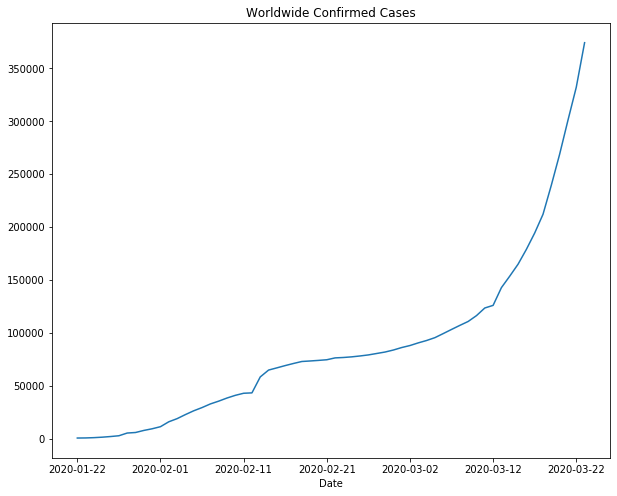

In [12]:
train_cases_conf.plot(figsize = (10,8), title = 'Worldwide Confirmed Cases')

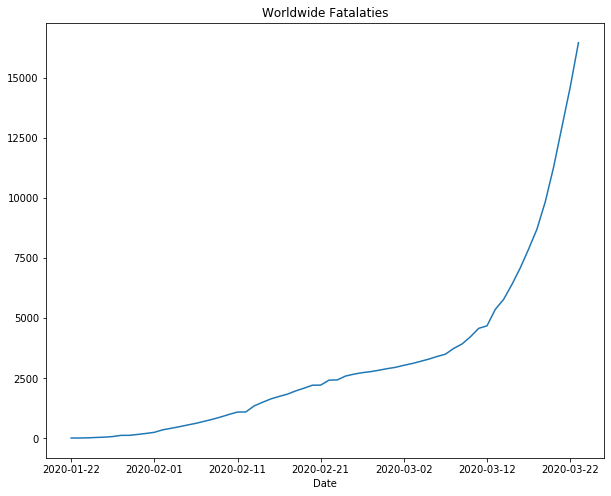

In [13]:
train_fatal.plot(figsize = (10,8), title = 'Worldwide Fatalaties')

In [14]:
# Checking Confirmed cases and fatalities for China

# Filtering out China
china_filt = df_train['Country/Region'] == 'China'
# 2013 Entries for China, Province Data is Also Present
# use loc to filter and then grouping 

train_conf_china = df_train.loc[china_filt].groupby(['Date'])['ConfirmedCases'].sum()
train_conf_china

Date
2020-01-22      533.0
2020-01-23      618.0
2020-01-24      882.0
2020-01-25     1321.0
2020-01-26     1921.0
               ...   
2020-03-19    78861.0
2020-03-20    78946.0
2020-03-21    78992.0
2020-03-22    79070.0
2020-03-23    79158.0
Name: ConfirmedCases, Length: 62, dtype: float64

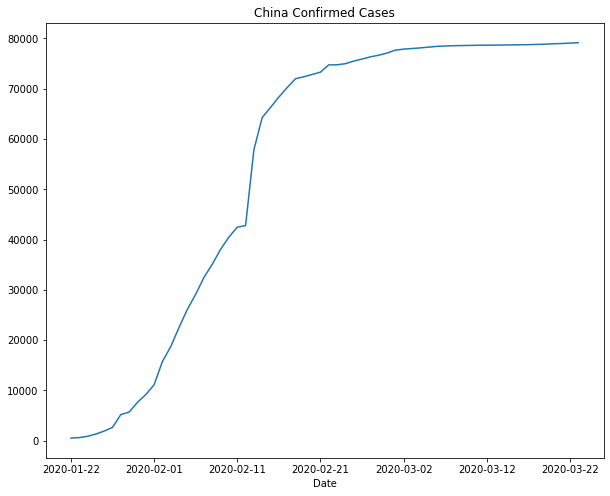

In [15]:
train_conf_china.plot(figsize = (10,8), title = 'China Confirmed Cases')

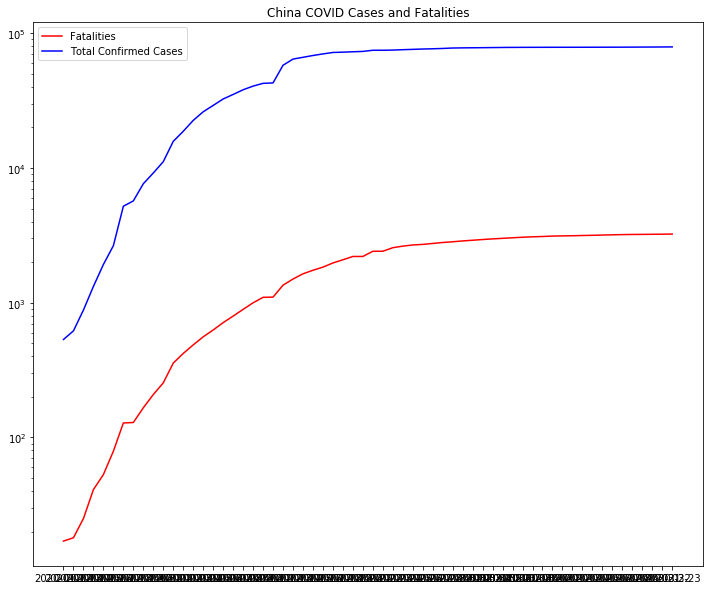

In [16]:
# grouping using same china filter to get fatalities on each date (grouped by date)
# groupby([list of columns to groupby]) [which columns to apply aggregate fx to ]. (aggregate function)


train_china_fatal = df_train.loc[china_filt].groupby(['Date'])['Fatalities'].sum()

#train_china_fatal.plot(figsize= (10,8) , title = 'China Total Fatalaties')

plt.figure(figsize=(12,10))
plt.axes(yscale ='log', )
plt.plot(train_china_fatal.index, train_china_fatal.tolist(), 'r', label = 'Fatalities')
plt.plot(train_conf_china.index, train_conf_china.tolist(), 'b', label = 'Total Confirmed Cases')
plt.title('China COVID Cases and Fatalities')
plt.legend()

In [17]:
# Checking Total Cases by Country 

# as_index = False to not make the grouping column the index, creates a df her instead of series, preserves
# Confirmedcases column

train_case_country = df_train.groupby(['Country/Region'], as_index=False)['ConfirmedCases'].sum()

# Sorting by number of cases
train_case_country.sort_values('ConfirmedCases', ascending=False, inplace = True)
train_case_country

,Country/Region,ConfirmedCases
29,China,3421218.0
75,Italy,502748.0
71,Iran,254181.0
139,Spain,192568.0
82,"Korea, South",181763.0
...,...,...
58,Greenland,0.0
60,Guam,0.0
149,The Gambia,0.0
148,The Bahamas,0.0


<BarContainer object of 5 artists>

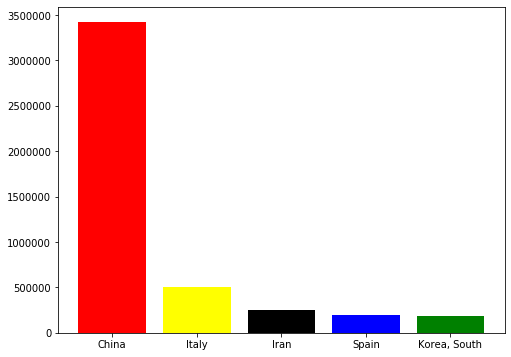

In [18]:
# Plotting bargraph for 5 most affected countries

plt.figure(figsize=(8,6))
plt.bar(train_case_country['Country/Region'][:5], train_case_country['ConfirmedCases'][:5], color = ['red', 'yellow','black','blue','green'])

#### No. of Cases on a Particular Day, (Not Increase, Cumulative)

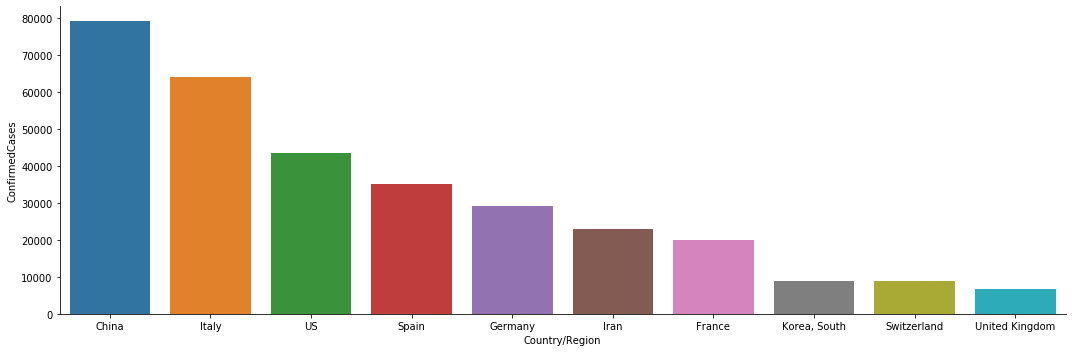

In [19]:
# Confirmed Cases till a particular day by country

Date = '2020-03-23'

train_case_country_march = df_train.groupby(['Country/Region', 'Date'], as_index=False)['ConfirmedCases'].sum()

# Filter for data for 23/03

df_23_3 = df_train['Date'] == Date

# Sort Values
# train_case_country.sort_values('ConfirmedCases', ascending=False, inplace = True)

train_case_country_march = train_case_country_march.loc[df_23_3]

train_case_country_march.sort_values('ConfirmedCases', ascending = False, inplace = True)

sns.catplot(x = 'Country/Region', y = 'ConfirmedCases' , data = train_case_country_march.head(10), height=5,aspect=3, kind = 'bar')

# Data Wrangling/ Pre-processing/ Cleaning 
Process of converting or mapping data from original raw form into another format, preparing it for further analysis.
1. Identifying and Handling missing values.
2. Data Formating.
3. Data Normalization(centering and scaling).
4. Data bining.
5. Turning categorical values into numerical values.

### Need to Exclude Leaky Data, the same Dates are in both train and test set.
1. First convert object to python datetime type <br>
Using pd.to_datetime() <br>
Check Getting converted to float, because haven't converted to date before comparison, still object.

In [260]:
df_train.Date = pd.to_datetime(df_train['Date'])
print(df_train['Date'].max())
print(df_test['Date'].min())

2020-03-23 00:00:00
2020-03-12 00:00:00


### Lets truncate df_train by date < df_test['Date'].min()

In [261]:
date_filter = df_train['Date'] < df_test['Date'].min()
df_train = df_train.loc[date_filter]

In [262]:
# Dropping ID and getting rid of Province/State with NULL values 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14200 entries, 0 to 17595
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              14200 non-null  int64         
 1   Province/State  6500 non-null   object        
 2   Country/Region  14200 non-null  object        
 3   Lat             14200 non-null  float64       
 4   Long            14200 non-null  float64       
 5   Date            14200 non-null  datetime64[ns]
 6   ConfirmedCases  14200 non-null  float64       
 7   Fatalities      14200 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 998.4+ KB


In [263]:
# lets get Cumulative sum of ConfirmedCases and Fatalities for each country on each data (same as original data)
# Doing to create copy without ID and 

train_country_date = df_train.groupby(['Country/Region', 'Date', 'Lat', 'Long'], as_index=False)['ConfirmedCases', 'Fatalities'].sum()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [264]:
print(train_country_date.info())
print(train_country_date.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14200 entries, 0 to 14199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  14200 non-null  object        
 1   Date            14200 non-null  datetime64[ns]
 2   Lat             14200 non-null  float64       
 3   Long            14200 non-null  float64       
 4   ConfirmedCases  14200 non-null  float64       
 5   Fatalities      14200 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 776.6+ KB
None
Country/Region    0
Date              0
Lat               0
Long              0
ConfirmedCases    0
Fatalities        0
dtype: int64


### Feature Engineering
Splitting Date into day, month, day of week. <br>
Check if Date is in python datetime format. Else, convert object to python datetime type <br>
Using pd.to_datetime()

In [265]:
train_country_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14200 entries, 0 to 14199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  14200 non-null  object        
 1   Date            14200 non-null  datetime64[ns]
 2   Lat             14200 non-null  float64       
 3   Long            14200 non-null  float64       
 4   ConfirmedCases  14200 non-null  float64       
 5   Fatalities      14200 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 776.6+ KB


#### Using Pandas Series.dt.month
The month as January=1, December=12.

In [266]:
# Adding day, month, day of week columns 

train_country_date['Month'] = train_country_date['Date'].dt.month
train_country_date['Day'] = train_country_date['Date'].dt.day
train_country_date['Day_Week'] = train_country_date['Date'].dt.dayofweek
train_country_date['quarter'] = train_country_date['Date'].dt.quarter
train_country_date['dayofyear'] = train_country_date['Date'].dt.dayofyear
train_country_date['weekofyear'] = train_country_date['Date'].dt.weekofyear

In [267]:
train_country_date.head()

,Country/Region,Date,Lat,Long,ConfirmedCases,Fatalities,Month,Day,Day_Week,quarter,dayofyear,weekofyear
0,Afghanistan,2020-01-22,33.0,65.0,0.0,0.0,1,22,2,1,22,4
1,Afghanistan,2020-01-23,33.0,65.0,0.0,0.0,1,23,3,1,23,4
2,Afghanistan,2020-01-24,33.0,65.0,0.0,0.0,1,24,4,1,24,4
3,Afghanistan,2020-01-25,33.0,65.0,0.0,0.0,1,25,5,1,25,4
4,Afghanistan,2020-01-26,33.0,65.0,0.0,0.0,1,26,6,1,26,4


In [268]:
train_country_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14200 entries, 0 to 14199
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  14200 non-null  object        
 1   Date            14200 non-null  datetime64[ns]
 2   Lat             14200 non-null  float64       
 3   Long            14200 non-null  float64       
 4   ConfirmedCases  14200 non-null  float64       
 5   Fatalities      14200 non-null  float64       
 6   Month           14200 non-null  int64         
 7   Day             14200 non-null  int64         
 8   Day_Week        14200 non-null  int64         
 9   quarter         14200 non-null  int64         
 10  dayofyear       14200 non-null  int64         
 11  weekofyear      14200 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 1.4+ MB


#### Same Feature Engineering for Test Set

In [270]:
# First drop Province/State
df_test.drop('Province/State', axis = 1, inplace = True)

# Converting Date Object to Datetime type

df_test.Date = pd.to_datetime(df_test['Date'])
df_test.head(2)

,ForecastId,Country/Region,Lat,Long,Date,Month,Day,Day_Week
0,1,Afghanistan,33.0,65.0,2020-03-12,3,12,3
1,2,Afghanistan,33.0,65.0,2020-03-13,3,13,4


In [271]:
# adding Month, DAy, Day_week columns Using Pandas Series.dt.month

df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] = df_test['Date'].dt.day
df_test['Day_Week'] = df_test['Date'].dt.dayofweek
df_test['quarter'] = df_test['Date'].dt.quarter
df_test['dayofyear'] = df_test['Date'].dt.dayofyear
df_test['weekofyear'] = df_test['Date'].dt.weekofyear

In [272]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ForecastId      12212 non-null  int64         
 1   Country/Region  12212 non-null  object        
 2   Lat             12212 non-null  float64       
 3   Long            12212 non-null  float64       
 4   Date            12212 non-null  datetime64[ns]
 5   Month           12212 non-null  int64         
 6   Day             12212 non-null  int64         
 7   Day_Week        12212 non-null  int64         
 8   quarter         12212 non-null  int64         
 9   dayofyear       12212 non-null  int64         
 10  weekofyear      12212 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 1.0+ MB


#### Councatenating Train-Test to Label encode Country/Region Categorical Variable.
1. Make copy of train data without Confirmed Cases and Fatalities. Index - 0 to 17608
2. Concatenate train, test.
3. Label Encode Countries.
4. Add back Cofirmed Cases, Fatalities columns to clean_train_data.
5. Modelling
6. Saving Predicted Values with ForecastID

In [273]:
# train_country_date
# df_test
# Lets select the Common Labels and concatenate.

labels = ['Country/Region', 'Lat', 'Long', 'Date', 'Month', 'Day', 'Day_Week','quarter', 'dayofyear', 'weekofyear']

df_train_clean = train_country_date[labels]
df_test_clean = df_test[labels]

data_clean = pd.concat([df_train_clean, df_test_clean], axis = 0)

In [274]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26412 entries, 0 to 12211
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  26412 non-null  object        
 1   Lat             26412 non-null  float64       
 2   Long            26412 non-null  float64       
 3   Date            26412 non-null  datetime64[ns]
 4   Month           26412 non-null  int64         
 5   Day             26412 non-null  int64         
 6   Day_Week        26412 non-null  int64         
 7   quarter         26412 non-null  int64         
 8   dayofyear       26412 non-null  int64         
 9   weekofyear      26412 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 2.2+ MB


## Modeling - Regression Problem 
Using features Country/Region, Lat, Long, Month, Day, Day_week.<br>
To predict ConfirmedCases, Fatalities.
### To predict 2 Different Target Variables, Train two classifiers, one for each ?

## Preparing Data For Models - LabelEncode Country

In [275]:
from sklearn.preprocessing import LabelEncoder

In [276]:
# Label Encoder for Countries 

enc = LabelEncoder()
data_clean['Country'] = enc.fit_transform(data_clean['Country/Region'])
data_clean

,Country/Region,Lat,Long,Date,Month,Day,Day_Week,quarter,dayofyear,weekofyear,Country
0,Afghanistan,33.0000,65.0000,2020-01-22,1,22,2,1,22,4,0
1,Afghanistan,33.0000,65.0000,2020-01-23,1,23,3,1,23,4,0
2,Afghanistan,33.0000,65.0000,2020-01-24,1,24,4,1,24,4,0
3,Afghanistan,33.0000,65.0000,2020-01-25,1,25,5,1,25,4,0
4,Afghanistan,33.0000,65.0000,2020-01-26,1,26,6,1,26,4,0
...,...,...,...,...,...,...,...,...,...,...,...
12207,Zambia,-15.4167,28.2833,2020-04-19,4,19,6,2,110,16,162
12208,Zambia,-15.4167,28.2833,2020-04-20,4,20,0,2,111,17,162
12209,Zambia,-15.4167,28.2833,2020-04-21,4,21,1,2,112,17,162
12210,Zambia,-15.4167,28.2833,2020-04-22,4,22,2,2,113,17,162


In [277]:
# Dropping Country/Region and Date

data_clean.drop(['Country/Region', 'Date'], axis = 1, inplace=True)

### Splitting Back into Train and Test

In [278]:
index_split = df_train.shape[0]
data_train_clean = data_clean[:index_split]

In [279]:
data_test_clean = data_clean[index_split:]

### Adding Back Confirmed Cases and Fatalities
Using original df_train, check shape is same, head, tail have same values. ORDER NEEDS TO BE SAME.

In [287]:
df_train[['ConfirmedCases', 'Fatalities']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14200 entries, 0 to 17595
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ConfirmedCases  14200 non-null  float64
 1   Fatalities      14200 non-null  float64
dtypes: float64(2)
memory usage: 972.8 KB


In [281]:
data_train_clean.tail(5)

,Lat,Long,Month,Day,Day_Week,quarter,dayofyear,weekofyear,Country
14195,-15.4167,28.2833,3,7,5,1,67,10,162
14196,-15.4167,28.2833,3,8,6,1,68,10,162
14197,-15.4167,28.2833,3,9,0,1,69,11,162
14198,-15.4167,28.2833,3,10,1,1,70,11,162
14199,-15.4167,28.2833,3,11,2,1,71,11,162


### Creating Features and Two Labels

In [308]:
x = data_train_clean[['Lat', 'Long', 'Month', 'Day', 'Day_Week', 'Country','quarter', 'dayofyear', 'weekofyear']]
y_case = df_train['ConfirmedCases']
y_fatal = df_train['Fatalities']

### Train-Test Split - Confirmed Cases

In [313]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_case, test_size = 0.3, random_state = 42)

### Train-Test Split - Fatalities

In [314]:
from sklearn.model_selection import train_test_split

x_train_fatal, x_test_fatal, y_train_fatal, y_test_fatal = train_test_split(x, y_fatal, test_size = 0.3, random_state = 42)

# Modelling
1. Linear Regression - Worse than baseline model. 
2. Logistic Regression (Will need GridSearchCV for Max_iter) - Absolute Trash.
3. Polynomial Regression - 
4. RandomForest Regressor - Gives 1.7 RMSE
5. GradientBoost Regressor

## 1. Linear Regression (Baseline Model) - No way Data Is Linear
<p> 1.5% Train Accuracy for Confirmed Cases <br>
    1% Train Accuracy for Fatalities]</p>
## Results 
RMSLE - 2.83352 <br>
Worse than Baseline (All 1's Baseline) - 2.53375

#### For Confirmed Cases

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
clf = LinearRegression()

clf.fit(x_train, y_train)

# R^2 Score
clf.score(x_train, y_train)

0.012682514510318876

In [49]:
# R^2 on test set 

clf.score(x_test, y_test)

# MSE on test set

y_pred_case = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred_case))

8923352.136088511


In [50]:
# Training for entire dataset and then Predicting Values, many negative
clf.fit(x, y_case)
y_predicted_cases_test = clf.predict(data_test_clean)
y_predicted_cases_test.shape

(12212, 1)

#### For Fatalities

In [51]:
clf.fit(x_train_fatal, y_train_fatal)
clf.score(x_train_fatal, y_train_fatal)

0.007446369342127612

In [52]:
# R2 for test 
clf.score(x_test_fatal, y_test_fatal)
# MSE for test 
y_pred_fatal = clf.predict(x_test_fatal)
print(mean_squared_error(y_test, y_pred_case))

8923352.136088511


In [53]:
# Training on entire set and Predicting Values 

clf.fit(x, y_fatal)
y_predicted_fatal_test = clf.predict(data_test_clean)
y_predicted_fatal_test.shape

(12212, 1)

#### Saving Predictions 

In [54]:
# Read Predictions CSV

#submission = pd.read_csv(path_sbumit)

In [55]:
#submission['ConfirmedCases'] = y_predicted_cases_test
#submission['Fatalities'] = y_predicted_fatal_test
#submission.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,787.113608,29.425419
1,2,861.681318,32.044361
2,3,936.249028,34.663304
3,4,1010.816739,37.282247
4,5,641.263975,25.197525


In [56]:
#submission.to_csv('submission_base_linear_reg.csv', index = False)

## 2. Logistic Regression - Seems Useless, Only Predicting 0 or 76. HIgher MSE
<p>R^2 Seems like a useless metric here. <br>
    </p>
## Results 
Haven't submitted <br>
Worse than Baseline (All 1's Baseline) - 2.53375

### Scaling Data

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [120]:
#  Input For Pipeline is a list of tuple, with name and constructor of transformation in each

Input = [('scale', StandardScaler()), ('clf_log', LogisticRegression(multi_class='multinomial', solver = 'lbfgs'))]

clf_log = Pipeline(Input)

In [121]:
# Fitting for ConfirmedCases on Train data
clf_log.fit(x_train, y_train.values.ravel())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf_log',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [122]:
# R2 Error on Train Set
clf_log.score(x_train, y_train.values.reshape(-1))

0.6159837728194726

In [123]:
# MSE on Train Set
y_pred_train = clf_log.predict(x_train)
mean_squared_error( y_train, y_pred_train)

13331822.261906695

In [124]:
y_pred_train

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 7.600e+01, 

In [100]:
# On Test Set 

clf_log.score(x_test, y_test.values.reshape(-1))

0.6320272572402045

In [105]:
y_pred_test = clf_log.predict(x_test)
mean_squared_error( y_test, y_pred_test)

9049844.18985425

In [126]:
y_pred_test

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.760e+02,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 7.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

## 3. RandomForest Regressor
Train MSE 284698.84113318456 <br>
Submission RMSLE - 1.70407

In [315]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### For ConfirmedCases

In [316]:
rf = RandomForestRegressor(n_estimators =100)
rf.fit(x_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [317]:
rf.score(x_train, y_train)

0.9591737031227728

In [318]:
rf.score(x_test, y_test)

0.7549899816776947

In [319]:
# Predicted Values and MSE
y_pred_train = rf.predict(x_train)
print(mean_squared_error(y_train, y_pred_train))

305804.0101585714


In [320]:
# Training on entire set and predict values.

rf.fit(x, y_case.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [321]:
# Predicted ConfirmedCases
rf_pred_case = rf.predict(data_test_clean)

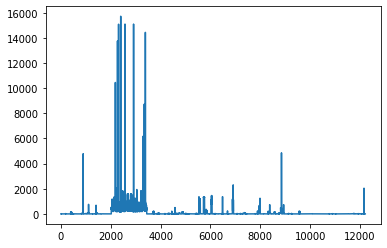

In [322]:
plt.plot(rf_pred_case)

#### For Fatalities

In [323]:
rf.fit(x, y_fatal.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [324]:
rf_pred_fatal = rf.predict(data_test_clean)

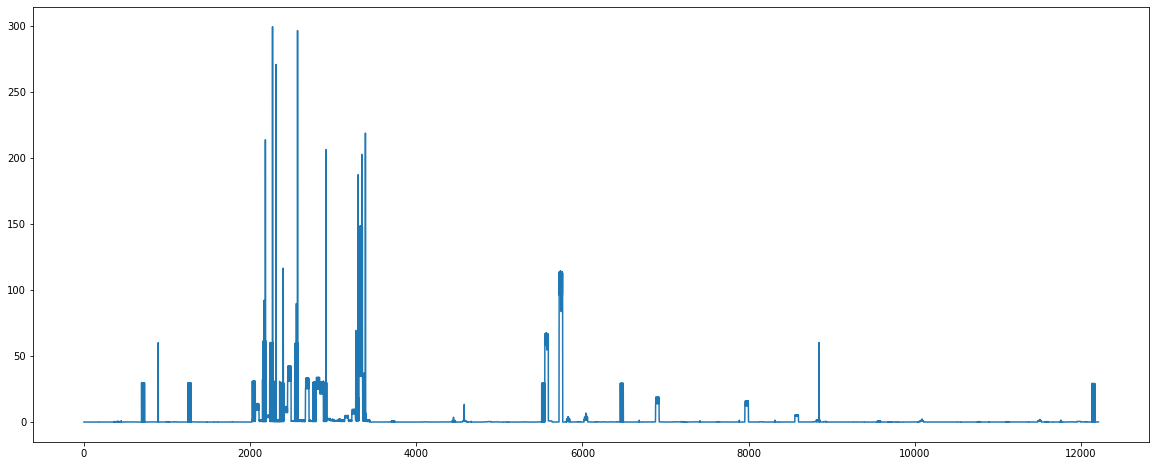

In [327]:
plt.figure(figsize=(20,8))
plt.plot(rf_pred_fatal)

In [145]:
# Saving to Submission.csv

submission = pd.read_csv(path_sbumit)
submission['ConfirmedCases'] = rf_pred_case
submission['Fatalities'] = rf_pred_fatal

submission.to_csv('submission_base_linear_reg.csv', index = False)

## 4. SVM Regressor with Polynomial Kernel
Hyperparameter C is regularization( large value = less regularisation) and epsilon is margin width.

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [172]:
Input = [('scale', StandardScaler()), ('SVM_R', SVR(kernel = 'poly', degree=10, C= 1, epsilon =.1 ))]

pipe_svm = Pipeline(Input)

In [181]:
# Baseline
y_pred_base = [1 for x in range(5283)]
len(y_pred_base)

5283

In [182]:
pipe_svm.fit(x_train, y_train.values.ravel())
print(pipe_svm.score(x_train, y_train.values.ravel()))
# test MSE to BEAT - 284698
y_hat_svm = pipe_svm.predict(x_test)
print(mean_squared_error(y_test, y_hat_svm))

-0.008127130263116511
9047229.986672888


9047229.986672888


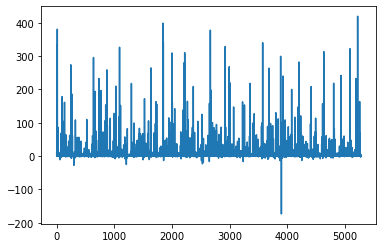

In [183]:
# test MSE to BEAT - 284698
y_hat_svm = pipe_svm.predict(x_test)
print(mean_squared_error(y_test, y_hat_svm))
plt.plot(y_hat_svm)

In [186]:
print(mean_squared_error(y_test,y_pred_base))

9051190.917092562


In [226]:
#y_hat_svm

## 5. XGBoost Regressor

In [228]:
import xgboost as xgb

In [229]:
reg = xgb.XGBRegressor(n_estimators = 1000)

#### For ConfirmedCases

In [230]:
reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [231]:
reg.score(x_train, y_train)

0.9999510108228062

In [233]:
reg_y_pred = reg.predict(x_train)

In [234]:
mean_squared_error(y_train, reg_y_pred)

647.6922730617972

In [235]:
reg.score(x_test, y_test)

0.7416394933658135

In [236]:
# Slightly Better than Random Forest 
reg_y_test_pred = reg.predict(x_test)
mean_squared_error(y_test, reg_y_test_pred)

2322924.872696761

In [237]:
reg.fit(x, y_case)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [238]:
xgb_pred_case = reg.predict(data_test_clean)

#### For Fatalities

In [239]:
reg.fit(x, y_fatal)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [240]:
xgb_pred_fatal = reg.predict(data_test_clean)

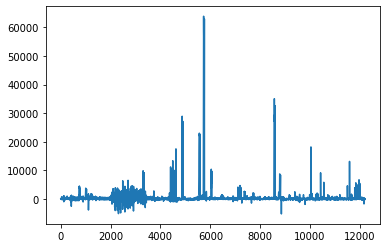

In [243]:
plt.plot(xgb_pred_case)

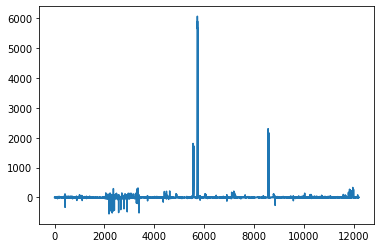

In [242]:
plt.plot(xgb_pred_fatal)

In [241]:
# Saving to Submission.csv

submission = pd.read_csv(path_sbumit)
submission['ConfirmedCases'] = xgb_pred_case
submission['Fatalities'] = xgb_pred_fatal

submission.to_csv('submission_xgb.csv', index = False)